In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
final_queries = pd.read_csv("../Results/query_EP_categorised.csv")
gemma_EP = pd.read_csv("../Results/gemma_EP.csv")
gemma_RQ_EP = pd.read_csv("../Results/gemma_RQ_EP.csv")

gpt_EP = pd.read_csv("../Results/gpt_EP.csv")
gpt_RQ_EP = pd.read_csv("../Results/gpt_RQ_EP.csv")

## Merging all EPs

In [3]:
final_queries = pd.read_csv("../Results/query_EP_categorised.csv")
gemma_EP = pd.read_csv("../Results/gemma_EP.csv")
gemma_RQ_EP = pd.read_csv("../Results/gemma_RQ_EP.csv")

gpt_EP = pd.read_csv("../Results/gpt_EP.csv")
gpt_RQ_EP = pd.read_csv("../Results/gpt_RQ_EP.csv")


emo_features = ["positive", "negative", "neutral", "joy", "anger", "surprise", "disgust", "fear", "sadness", "trust", "anticipation"]
all_EP = []

for _, row in gemma_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "OG",
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gemma_RQ_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "RQ_"+row["gender"],
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gpt_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "OG",
            "GPT",
            emo,
            row[emo]
        ])

for _, row in gpt_RQ_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "RQ_"+row["gender"],
            "GPT",
            emo,
            row[emo]
        ])

all_EP_df = pd.DataFrame(all_EP, columns=["query", "query_len_type", "query_sentiment", "query_search_type", "query_form", "LLM", "emo_feature_name", "emo_feature_percent"])
all_EP_df.to_csv("../Results/all_EP.csv", index=False)
all_EP_df

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,positive,30.22
1,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,negative,28.45
2,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,neutral,41.33
3,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,joy,12.34
4,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,anger,12.89
...,...,...,...,...,...,...,...,...
9675,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_neutral,GPT,disgust,12.05
9676,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_neutral,GPT,fear,12.79
9677,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_neutral,GPT,sadness,12.53
9678,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_neutral,GPT,trust,13.14


## Query distributions

In [4]:
final_queries.head()

,query,source,query_len_type,query_len,search_type,query_sentiment_type,topic,positive,negative,neutral,joy,anger,surprise,disgust,fear,sadness,trust,anticipation
0,Chi era il padre di Micerino ?,IT-GUI,short,6,multisteps,neutral,history,25.31,30.15,44.54,12.53,13.28,12.68,11.66,12.12,12.82,13.11,11.81
1,Il figlio di Chefren,IT-GUI,short,4,multisteps,neutral,history,26.92,32.38,40.70,12.59,13.23,12.38,12.15,12.43,12.67,12.55,12.00
2,Il padre di Micerino,IT-GUI,short,4,multisteps,neutral,history,25.31,30.15,44.54,12.53,13.28,12.68,11.66,12.12,12.82,13.11,11.81
3,Micerino,IT-GUI,short,1,multisteps,positive,history,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Quanto e alta la tomba di Cheope?,IT-GUI,long,7,fact,neutral,history,28.06,31.37,40.57,12.56,12.96,12.69,12.17,12.34,12.77,12.19,12.32


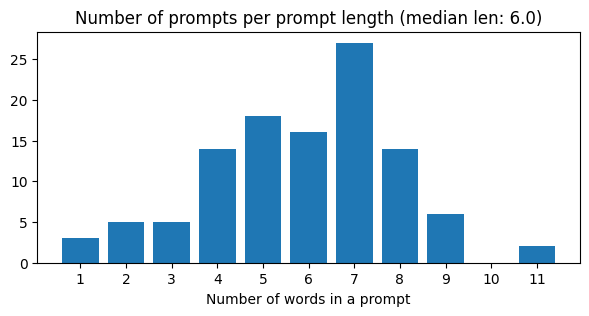

In [5]:
query_lengths = final_queries.query_len.value_counts().sort_index().keys().tolist()
query_len_counts = final_queries.query_len.value_counts().sort_index().values.tolist()

fig = plt.figure(figsize=(7,3))
ax = plt.bar(query_lengths, query_len_counts)
plt.xticks(list(range(min(query_lengths), max(query_lengths)+1)))
plt.xlabel("Number of words in a prompt")
plt.title("Number of prompts per prompt length (median len: " + str(round(np.median(final_queries.query_len), 2)) + ")")
plt.savefig("../Figures/Query_Distribution/prompt_length.pdf", dpi=300, bbox_inches='tight')
plt.show()

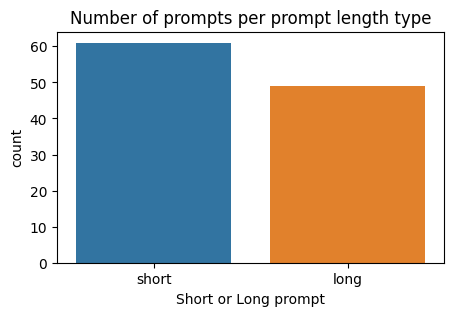

In [6]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(data=final_queries, x="query_len_type")
# plt.xticks(rotation=30)
plt.xlabel("Short or Long prompt")
plt.title("Number of prompts per prompt length type")
plt.savefig("../Figures/Query_distribution/prompt_len_type.pdf", dpi=300, bbox_inches="tight")
plt.show()

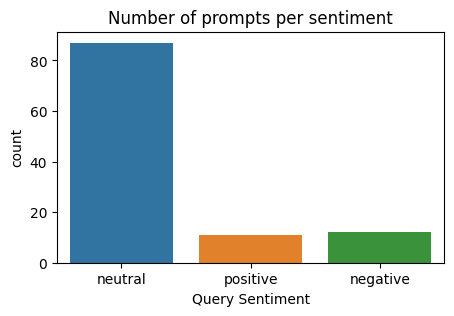

In [7]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(data=final_queries, x="query_sentiment_type")
# plt.xticks(rotation=30)
plt.xlabel("Query Sentiment")
plt.title("Number of prompts per sentiment")
plt.savefig("../Figures/Query_distribution/sentiment.pdf", dpi=300, bbox_inches="tight")
plt.show()

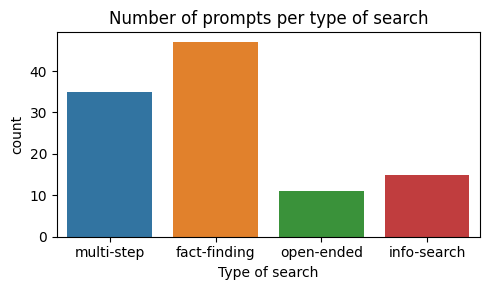

In [8]:
fig = plt.figure(figsize=(5,3))
data = final_queries.loc[final_queries["search_type"]!="unknown"]
ax = sns.countplot(data=data, x="search_type")

xtick_label_dict = {
    "multisteps": "multi-step",
    "fact": "fact-finding",
    "opensearch": "open-ended",
    "infosearch": "info-search"
}

ax.set_xticklabels([xtick_label_dict[label.get_text()] for label in list(ax.get_xticklabels())])
# plt.xticks(rotation=30)
plt.xlabel("Type of search")
plt.title("Number of prompts per type of search")
plt.tight_layout()
plt.savefig("../Figures/Query_distribution/search_type.pdf", dpi=300, bbox_inches="tight")
plt.show()

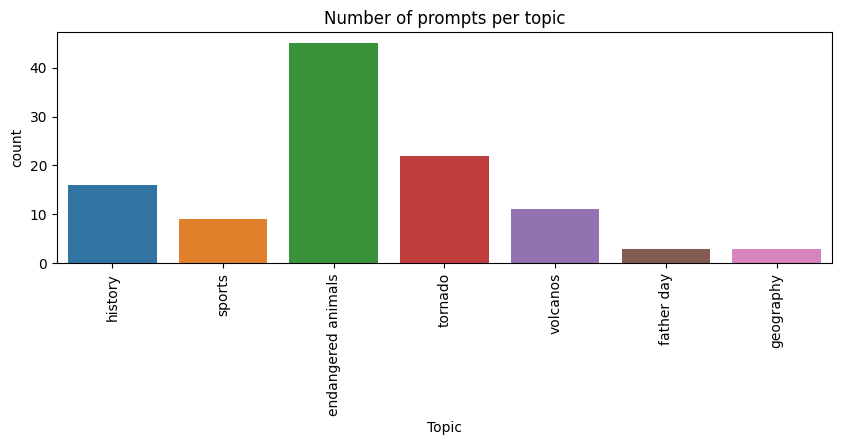

In [9]:
fig = plt.figure(figsize=(10,3))
ax = sns.countplot(data=final_queries, x="topic")
plt.xticks(rotation=90)
plt.title("Number of prompts per topic")
plt.xlabel("Topic")
plt.savefig("../Figures/Query_distribution/topic.pdf", dpi=300, bbox_inches = "tight")
plt.show()

## Response EPs

### General comparison

In [10]:
all_EP_df = pd.read_csv("../Results/all_EP.csv")
search_type_dict = {
    "multisteps": "multi-step",
    "fact": "fact-finding",
    "opensearch": "open-ended",
    "infosearch": "info-search",
    "unknown": "unknown"
}

all_EP_df["query_search_type"] = [search_type_dict[search_type] for search_type in all_EP_df["query_search_type"]]
all_EP_df_sent = all_EP_df.loc[(all_EP_df["emo_feature_name"]=="positive") | (all_EP_df["emo_feature_name"]=="negative") | (all_EP_df["emo_feature_name"]=="neutral")]
all_EP_df_emo = all_EP_df.drop(index=all_EP_df_sent.index).reset_index().drop(columns=["index"])
all_EP_df_sent = all_EP_df_sent.reset_index().drop(columns=["index"])

In [11]:
all_EP_df_sent

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,positive,30.22
1,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,negative,28.45
2,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,neutral,41.33
3,Il figlio di Chefren,short,neutral,multi-step,OG,Gemma,positive,26.92
4,Il figlio di Chefren,short,neutral,multi-step,OG,Gemma,negative,32.38
...,...,...,...,...,...,...,...,...
2635,vulcano attivo antico,short,neutral,fact-finding,RQ_neutral,GPT,negative,24.87
2636,vulcano attivo antico,short,neutral,fact-finding,RQ_neutral,GPT,neutral,42.99
2637,vulcano piÃ¹ antico attivo,short,positive,fact-finding,RQ_neutral,GPT,positive,32.53
2638,vulcano piÃ¹ antico attivo,short,positive,fact-finding,RQ_neutral,GPT,negative,24.15


In [12]:
all_EP_df_emo

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,joy,12.34
1,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,anger,12.89
2,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,surprise,12.42
3,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,disgust,11.81
4,Chi era il padre di Micerino ?,short,neutral,multi-step,OG,Gemma,fear,12.35
...,...,...,...,...,...,...,...,...
7035,vulcano piÃ¹ antico attivo,short,positive,fact-finding,RQ_neutral,GPT,disgust,12.05
7036,vulcano piÃ¹ antico attivo,short,positive,fact-finding,RQ_neutral,GPT,fear,12.79
7037,vulcano piÃ¹ antico attivo,short,positive,fact-finding,RQ_neutral,GPT,sadness,12.53
7038,vulcano piÃ¹ antico attivo,short,positive,fact-finding,RQ_neutral,GPT,trust,13.14


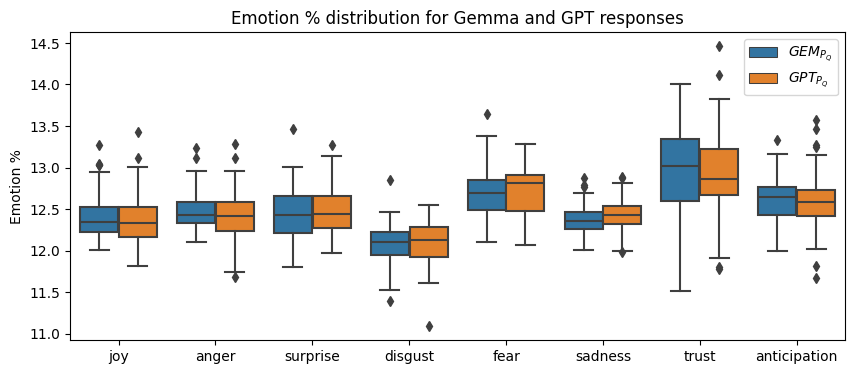

In [13]:
df = all_EP_df_emo.loc[(all_EP_df_emo["query_form"]=="OG")]
df = df.loc[df["emo_feature_percent"]!=0]
fig = plt.figure(figsize=(10,4))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="LLM", data=df)
handles, labels = ax.get_legend_handles_labels()

label_dict = {
    "Gemma": "$GEM_{P_Q}$",
    "GPT": "$GPT_{P_Q}$"
}

# plt.xlabel("Emotion")
plt.xlabel(None)
plt.ylabel("Emotion %")
plt.legend(handles, [label_dict[label] for label in labels])
plt.title(r"Emotion % distribution for Gemma and GPT responses")
plt.savefig("../Figures/Gemma_GPT/gen_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

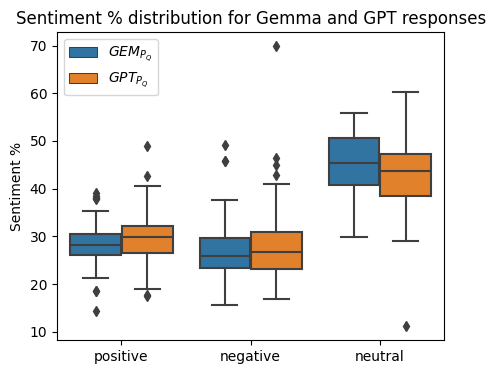

In [27]:
df = all_EP_df_sent.loc[(all_EP_df_sent["query_form"]=="OG")]
# df = df.loc[df["emo_feature_percent"]!=0]
fig = plt.figure(figsize=(5,4))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="LLM", data=df)
handles, labels = ax.get_legend_handles_labels()

label_dict = {
    "Gemma": "$GEM_{P_Q}$",
    "GPT": "$GPT_{P_Q}$"
}

# plt.xlabel("Sentiment")
plt.xlabel(None)
plt.ylabel("Sentiment %")
plt.legend(handles, [label_dict[label] for label in labels])
plt.title(r"Sentiment % distribution for Gemma and GPT responses")
plt.savefig("../Figures/Gemma_GPT/gen_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

### Prompt Category Wise

#### Prompt length

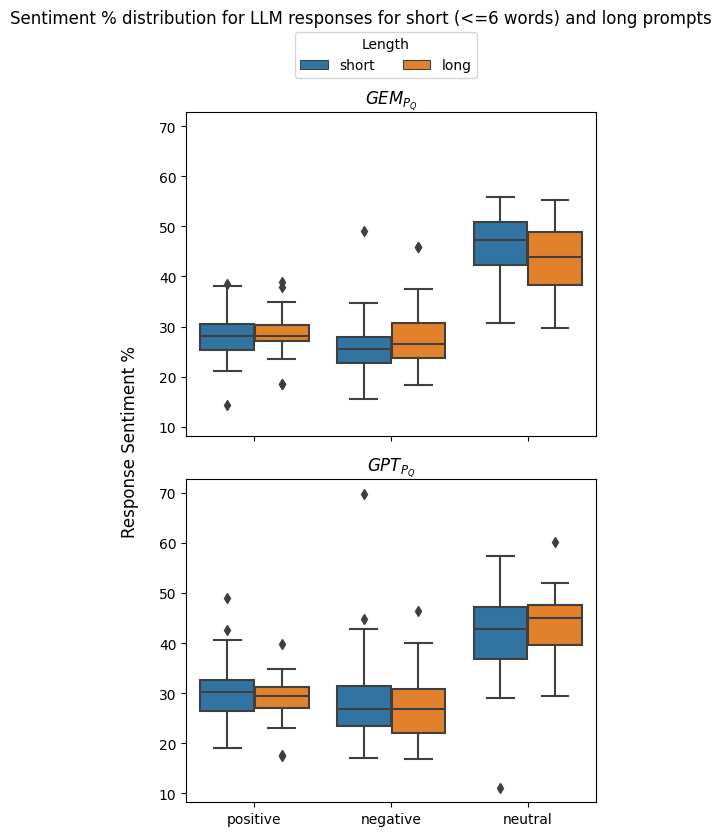

In [38]:
df_gemma = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="Gemma") & (all_EP_df_sent["query_form"]=="OG")]
df_gpt = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="GPT") & (all_EP_df_sent["query_form"]=="OG")]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,8), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("$GEM_{P_Q}$")
axes[1].set_title("$GPT_{P_Q}$")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %')
fig.suptitle(r"Sentiment % distribution for LLM responses for short (<=6 words) and long prompts", y=1.04)
fig.legend(handles, labels, loc='upper center', ncols=2, bbox_to_anchor = (0.55, 1.02), title="Length")
plt.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_len_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

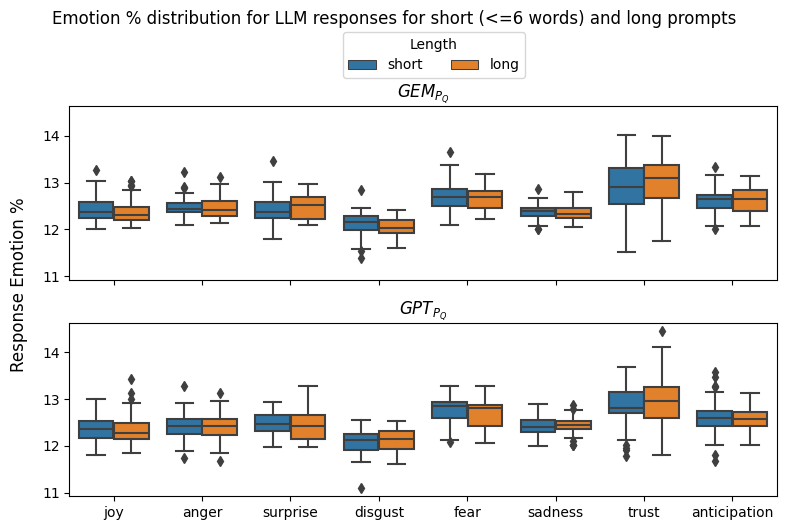

In [39]:
df_gemma = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="Gemma") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="GPT") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]!=0]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("$GEM_{P_Q}$")
axes[1].set_title("$GPT_{P_Q}$")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for short (<=6 words) and long prompts", y=1.05)
fig.legend(handles, labels, loc='upper center', ncols=2, bbox_to_anchor = (0.55, 1.02), title="Length")
fig.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_len_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

#### Prompt sentiment

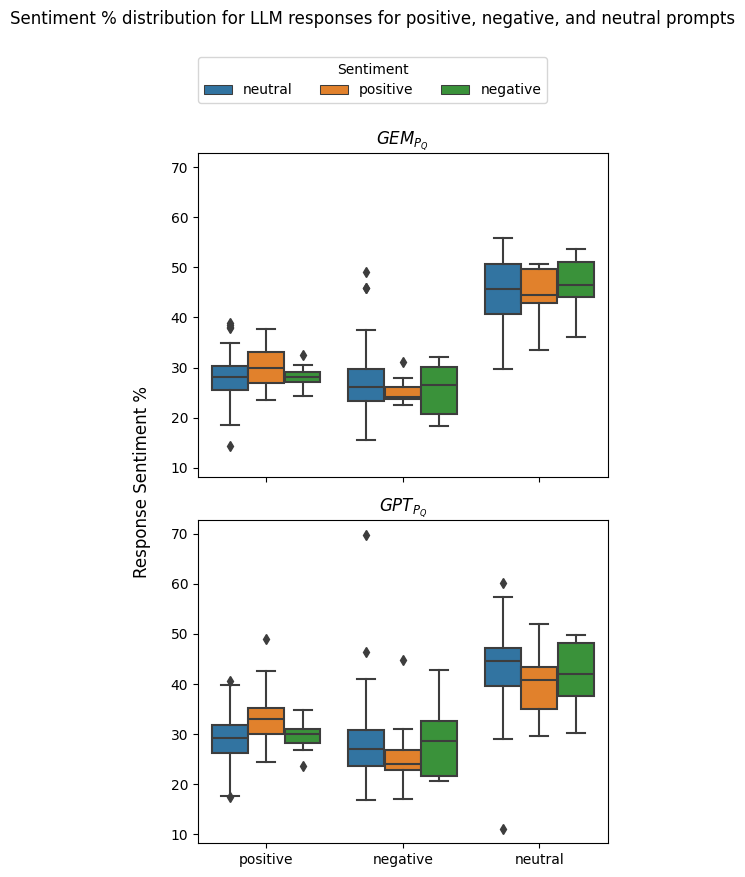

In [40]:
df_gemma = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="Gemma") & (all_EP_df_sent["query_form"]=="OG")]
df_gpt = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="GPT") & (all_EP_df_sent["query_form"]=="OG")]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,8), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("$GEM_{P_Q}$")
axes[1].set_title("$GPT_{P_Q}$")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %')
fig.suptitle(r"Sentiment % distribution for LLM responses for positive, negative, and neutral prompts", y=1.09, x=0.5)
fig.legend(handles, labels, loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.04), title="Sentiment")
plt.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_sentiment_type_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

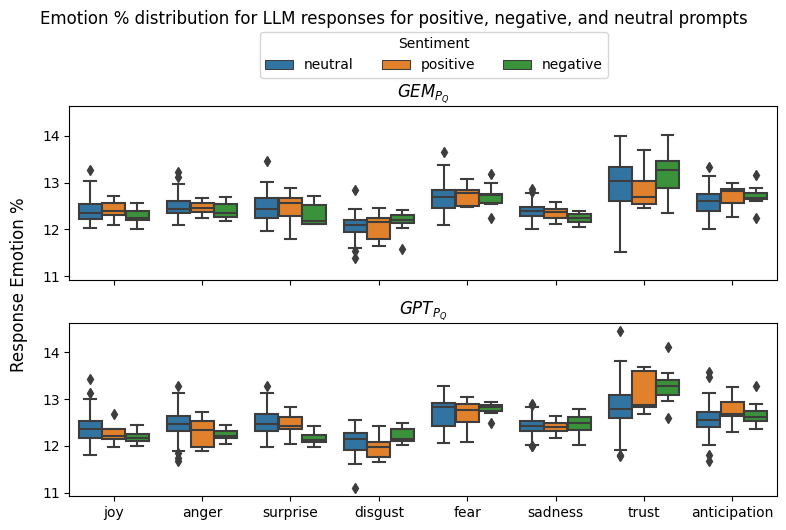

In [41]:
df_gemma = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="Gemma") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="GPT") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]!=0]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("$GEM_{P_Q}$")
axes[1].set_title("$GPT_{P_Q}$")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for positive, negative, and neutral prompts", y=1.05)
fig.legend(handles, labels, loc='upper center', ncols=3, bbox_to_anchor = (0.55, 1.02), title="Sentiment")
fig.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_sentiment_type_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

#### Prompt search type

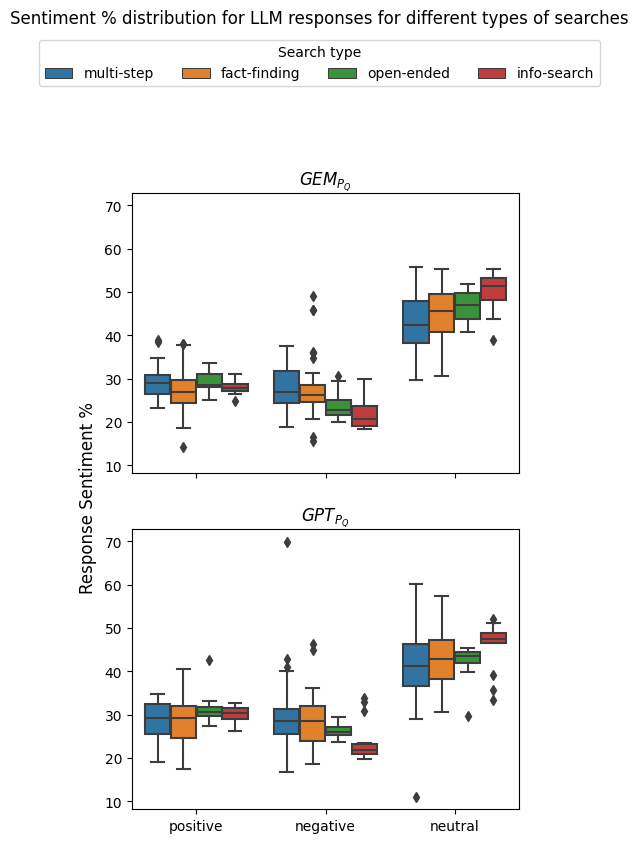

In [34]:
df_gemma = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="Gemma") & (all_EP_df_sent["query_form"]=="OG") & (all_EP_df_sent["query_search_type"]!="unknown")]
df_gpt = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="GPT") & (all_EP_df_sent["query_form"]=="OG") & (all_EP_df_sent["query_search_type"]!="unknown")]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,8), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("$GEM_{P_Q}$")
axes[1].set_title("$GPT_{P_Q}$")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %', x=0.02)
fig.suptitle(r"Sentiment % distribution for LLM responses for different types of searches", y=1.11, x=0.5)
fig.legend(handles, labels, loc='upper center', ncols=len(labels), bbox_to_anchor=(0.5, 1.08), title="Search type")
plt.savefig("../Figures/Query_categories/prompt_search_type_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

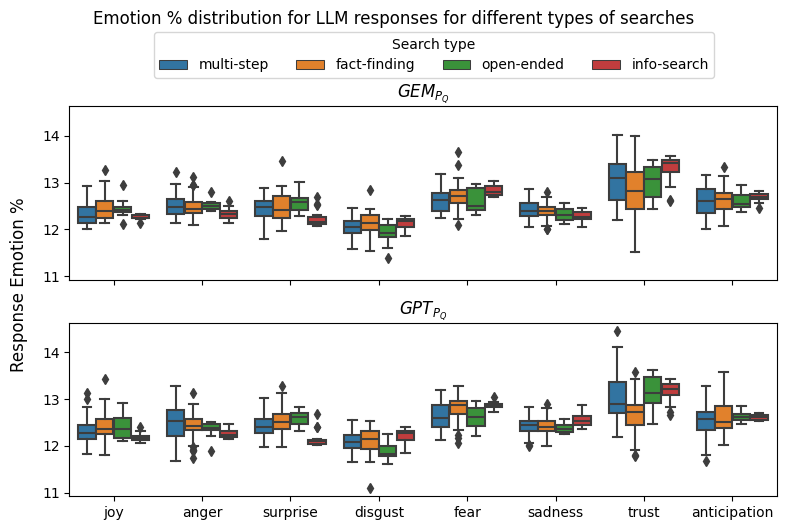

In [20]:
df_gemma = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="Gemma") & (all_EP_df_emo["query_form"]=="OG") & (all_EP_df_emo["query_search_type"]!="unknown")]
df_gpt = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="GPT") & (all_EP_df_emo["query_form"]=="OG") & (all_EP_df_emo["query_search_type"]!="unknown")] 
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]!=0]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("$GEM_{P_Q}$")
axes[1].set_title("$GPT_{P_Q}$")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for different types of searches", y=1.05)
fig.legend(handles, labels, loc='upper center', ncols=len(labels), bbox_to_anchor = (0.55, 1.02), title="Search type")
fig.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_search_type_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

### Prompt reformulation 

#### OG vs RQ

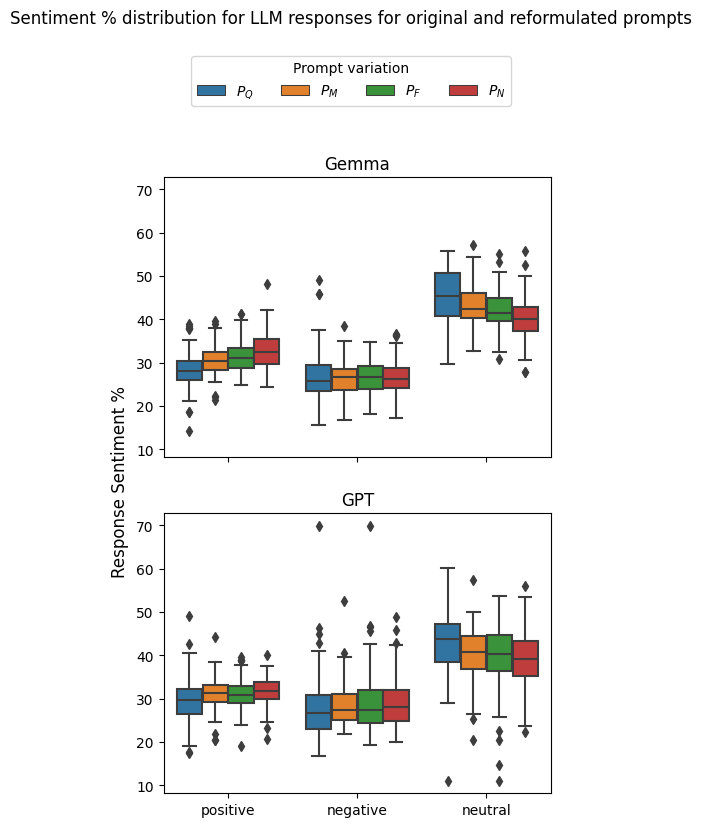

In [37]:
df_gemma = all_EP_df_sent.loc[all_EP_df_sent["LLM"]=="Gemma"]
df_gpt = all_EP_df_sent.loc[all_EP_df_sent["LLM"]=="GPT"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,8), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

label_name = {
    "OG": "$P_Q$",
    "RQ_male": "$P_{M}$",
    "RQ_female": "$P_{F}$",
    "RQ_neutral": "$P_{N}$"
}

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %', x=0.02)
fig.suptitle(r"Sentiment % distribution for LLM responses for original and reformulated prompts", y=1.09, x=0.5)
fig.legend(handles, [label_name[label] for label in labels], loc='upper center', ncols=4, bbox_to_anchor=(0.5, 1.04), title="Prompt variation")
plt.savefig("../Figures/Prompt_reformulation/OG_RQ_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

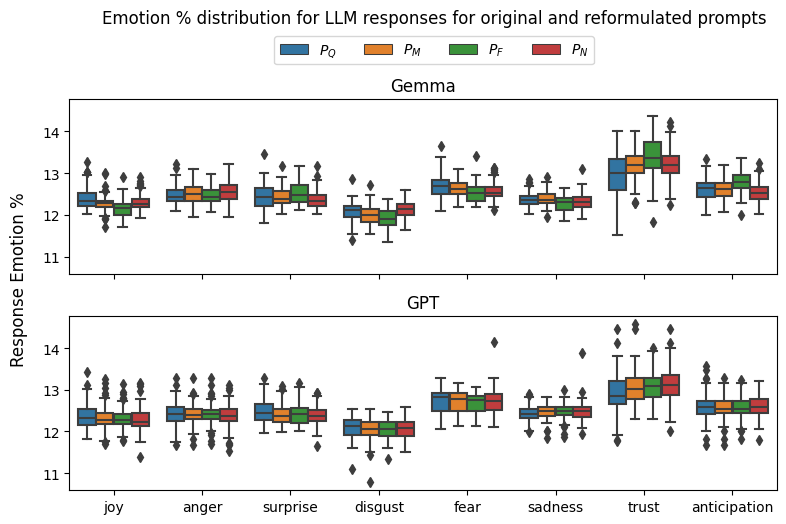

In [22]:
df_gemma = all_EP_df_emo.loc[all_EP_df_emo["LLM"]=="Gemma"]
df_gpt = all_EP_df_emo.loc[all_EP_df_emo["LLM"]=="GPT"]
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]>=10]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

label_name = {
    "OG": "$P_Q$",
    "RQ_male": "$P_{M}$",
    "RQ_female": "$P_{F}$",
    "RQ_neutral": "$P_{N}$"
}

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for original and reformulated prompts", x = 0.55, y=1.04)
fig.legend(handles, [label_name[label] for label in labels], loc='upper center', ncols=4, bbox_to_anchor = (0.55, 1))
fig.tight_layout()
plt.savefig("../Figures/Prompt_reformulation/OG_RQ_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

#### Male vs Female vs Neutral RQ

In [23]:
gemma_rouge = pd.read_csv("../Results/rouge_scores_Gemma.csv")
gemma_rouge["LLM"] = "Gemma"
gpt_rouge = pd.read_csv("../Results/rouge_scores_GPT.csv")
gpt_rouge["LLM"] = "GPT"
LLM_rouge = pd.concat([gemma_rouge, gpt_rouge])
LLM_rouge.head()

,Query,OG_male_rougeL,OG_male_rougeLsum,OG_female_rougeL,OG_female_rougeLsum,OG_neutral_rougeL,OG_neutral_rougeLsum,LLM
0,Chi era il padre di Micerino ?,0.222222,0.277778,0.176471,0.176471,0.111111,0.111111,Gemma
1,Il figlio di Chefren,0.090909,0.090909,0.307692,0.307692,0.068966,0.068966,Gemma
2,Il padre di Micerino,0.170213,0.170213,0.135593,0.135593,0.127660,0.127660,Gemma
3,Micerino,0.000000,0.000000,0.021505,0.021505,0.011050,0.011050,Gemma
4,Quanto e alta la tomba di Cheope?,0.266667,0.266667,0.170213,0.170213,0.222222,0.266667,Gemma


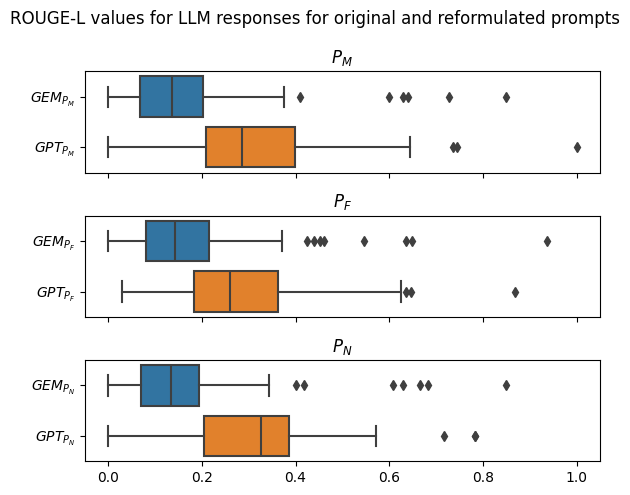

In [24]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize = (6,5), sharex=True)
sns.boxplot(data=LLM_rouge, y="LLM", x="OG_male_rougeL", ax=axes[0])
axes[0].set_title("$P_M$")
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
ytick_label_dict = {
    "Gemma": r"$GEM_{P_M}$",
    "GPT": r"$GPT_{P_M}$"
}
axes[0].set_yticklabels([ytick_label_dict[label.get_text()] for label in list(axes[0].get_yticklabels())])

sns.boxplot(data=LLM_rouge, y="LLM", x="OG_female_rougeL", ax=axes[1])
axes[1].set_title("$P_F$")
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
ytick_label_dict = {
    "Gemma": r"$GEM_{P_F}$",
    "GPT": r"$GPT_{P_F}$"
}
axes[1].set_yticklabels([ytick_label_dict[label.get_text()] for label in list(axes[1].get_yticklabels())])

sns.boxplot(data=LLM_rouge, y="LLM", x="OG_neutral_rougeL", ax=axes[2])
axes[2].set_title("$P_N$")
axes[2].set_xlabel(None)
axes[2].set_ylabel(None)
ytick_label_dict = {
    "Gemma": r"$GEM_{P_N}$",
    "GPT": r"$GPT_{P_N}$"
}
axes[2].set_yticklabels([ytick_label_dict[label.get_text()] for label in list(axes[2].get_yticklabels())])

plt.suptitle("ROUGE-L values for LLM responses for original and reformulated prompts")
plt.tight_layout()
plt.savefig("../Figures/Prompt_reformulation/OG_RQ_ROUGEL.pdf", dpi=300, bbox_inches = "tight")
plt.show()

## JSD

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gemma_JSD = pd.read_csv("../Results/gemma_avg_JSD.csv")
gemma_JSD.columns = [re.sub("_JSD", "", col) for col in gemma_JSD.columns]
gpt_JSD = pd.read_csv("../Results/gpt_avg_JSD.csv")
gpt_JSD.columns = [re.sub("_JSD", "", col) for col in gpt_JSD.columns]

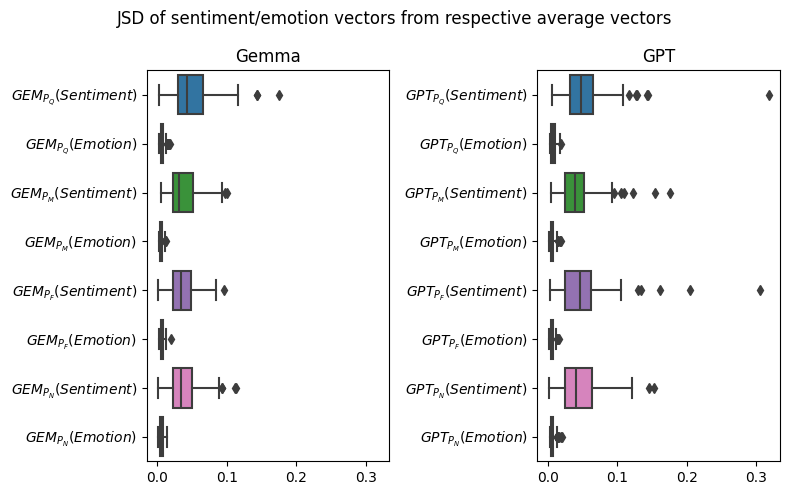

In [ ]:
fig, axes= plt.subplots(ncols=2, nrows=1, figsize=(8,5), sharex=True)
sns.boxplot(data=gemma_JSD, ax=axes[0],  orient="h")
axes[0].set_title("Gemma")
gemma_dict = {
    "OG_sentiment":"$GEM_{P_Q} (Sentiment)$",
    "OG_emotion":"$GEM_{P_Q} (Emotion)$",
    "RQ_male_sentiment": "$GEM_{P_M} (Sentiment)$",
    "RQ_male_emotion": "$GEM_{P_M} (Emotion)$",
    "RQ_female_sentiment": "$GEM_{P_F} (Sentiment)$",
    "RQ_female_emotion": "$GEM_{P_F} (Emotion)$",
    "RQ_neutral_sentiment": "$GEM_{P_N} (Sentiment)$",
    "RQ_neutral_emotion": "$GEM_{P_N} (Emotion)$"
}
axes[0].set_yticklabels([gemma_dict[label.get_text()] for label in axes[0].get_yticklabels()])

sns.boxplot(data=gpt_JSD, ax=axes[1],  orient="h")
axes[1].set_title("GPT")
gpt_dict = {
    "OG_sentiment":"$GPT_{P_Q} (Sentiment)$",
    "OG_emotion":"$GPT_{P_Q} (Emotion)$",
    "RQ_male_sentiment": "$GPT_{P_M} (Sentiment)$",
    "RQ_male_emotion": "$GPT_{P_M} (Emotion)$",
    "RQ_female_sentiment": "$GPT_{P_F} (Sentiment)$",
    "RQ_female_emotion": "$GPT_{P_F} (Emotion)$",
    "RQ_neutral_sentiment": "$GPT_{P_N} (Sentiment)$",
    "RQ_neutral_emotion": "$GPT_{P_N} (Emotion)$"
}
axes[1].set_yticklabels([gpt_dict[label.get_text()] for label in axes[1].get_yticklabels()])

plt.suptitle("JSD of sentiment/emotion vectors from respective average vectors")
plt.tight_layout()
plt.savefig("../Figures/JSD/avg_vectors.pdf", dpi=300, bbox_inches = "tight")
plt.show()


In [5]:
query_resp_JSD_gemma = pd.read_csv("../Results/query_resp_JSD_gemma.csv")
query_resp_JSD_gemma.columns = [re.sub("_JSD", "", col) for col in query_resp_JSD_gemma.columns]
query_resp_JSD_gemma.columns = ["query"] + ["Gemma_"+col for col in query_resp_JSD_gemma.drop(columns=["query"]).columns]
query_resp_JSD_gpt = pd.read_csv("../Results/query_resp_JSD_gpt.csv")
query_resp_JSD_gpt.columns = [re.sub("_JSD", "", col) for col in query_resp_JSD_gpt.columns]
query_resp_JSD_gpt.columns = ["query"] + ["GPT_"+col for col in query_resp_JSD_gpt.drop(columns=["query"]).columns]

In [6]:
result = pd.concat([query_resp_JSD_gemma, query_resp_JSD_gpt.drop(columns=["query"])], axis=1)
result = result[["query", "Gemma_OG_sentiment", "GPT_OG_sentiment", "Gemma_OG_emotion", "GPT_OG_emotion", "Gemma_RQ_male_sentiment", "GPT_RQ_male_sentiment", "Gemma_RQ_male_emotion", "GPT_RQ_male_emotion", "Gemma_RQ_female_sentiment", "GPT_RQ_female_sentiment", "Gemma_RQ_female_emotion", "GPT_RQ_female_emotion", "Gemma_RQ_neutral_sentiment", "GPT_RQ_neutral_sentiment", "Gemma_RQ_neutral_emotion", "GPT_RQ_neutral_emotion"]]
result.head()

,query,Gemma_OG_sentiment,GPT_OG_sentiment,Gemma_OG_emotion,GPT_OG_emotion,Gemma_RQ_male_sentiment,GPT_RQ_male_sentiment,Gemma_RQ_male_emotion,GPT_RQ_male_emotion,Gemma_RQ_female_sentiment,GPT_RQ_female_sentiment,Gemma_RQ_female_emotion,GPT_RQ_female_emotion,Gemma_RQ_neutral_sentiment,GPT_RQ_neutral_sentiment,Gemma_RQ_neutral_emotion,GPT_RQ_neutral_emotion
0,Chi era il padre di Micerino ?,0.038861,0.000000,0.010342,0.000000,0.089444,0.000000,0.014657,0.000000,0.063643,0.076109,0.019911,0.012326,0.068805,0.073793,0.014834,0.014675
1,Il figlio di Chefren,0.000000,0.107161,0.000000,0.010055,0.093027,0.083617,0.015255,0.016366,0.036826,0.109248,0.023318,0.011144,0.093905,0.093599,0.017279,0.011760
2,Il padre di Micerino,0.099105,0.092749,0.011103,0.013077,0.026061,0.065739,0.010601,0.013723,0.046321,0.000000,0.019911,0.000000,0.081338,0.054627,0.011054,0.015091
3,Micerino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Quanto e alta la tomba di Cheope?,0.073418,0.047990,0.009461,0.008223,0.026912,0.051338,0.004443,0.013312,0.058732,0.025928,0.013687,0.009044,0.064378,0.051803,0.020433,0.012637


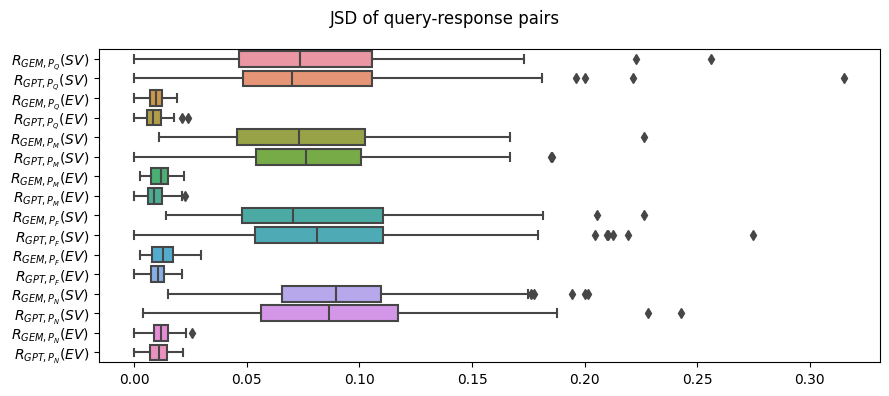

In [7]:
# fig, axes= plt.subplots(ncols=2, nrows=1, figsize=(8,5), sharex=True)
fig = plt.figure(figsize=(9,4))
ax = sns.boxplot(data=result, orient="h")
# axes[0].set_title("Gemma")
gemma_dict = {
    "Gemma_OG_sentiment":"$R_{GEM,{P_Q}} (SV)$",
    "Gemma_OG_emotion":"$R_{GEM,{P_Q}} (EV)$",
    "Gemma_RQ_male_sentiment": "$R_{GEM,{P_M}} (SV)$",
    "Gemma_RQ_male_emotion": "$R_{GEM,{P_M}} (EV)$",
    "Gemma_RQ_female_sentiment": "$R_{GEM,{P_F}} (SV)$",
    "Gemma_RQ_female_emotion": "$R_{GEM,{P_F}} (EV)$",
    "Gemma_RQ_neutral_sentiment": "$R_{GEM,{P_N}} (SV)$",
    "Gemma_RQ_neutral_emotion": "$R_{GEM,{P_N}} (EV)$",
    "GPT_OG_sentiment":"$R_{GPT,{P_Q}} (SV)$",
    "GPT_OG_emotion":"$R_{GPT,{P_Q}} (EV)$",
    "GPT_RQ_male_sentiment": "$R_{GPT,{P_M}} (SV)$",
    "GPT_RQ_male_emotion": "$R_{GPT,{P_M}} (EV)$",
    "GPT_RQ_female_sentiment": "$R_{GPT,{P_F}} (SV)$",
    "GPT_RQ_female_emotion": "$R_{GPT,{P_F}} (EV)$",
    "GPT_RQ_neutral_sentiment": "$R_{GPT,{P_N}} (SV)$",
    "GPT_RQ_neutral_emotion": "$R_{GPT,{P_N}} (EV)$"
}
ax.set_yticklabels([gemma_dict[label.get_text()] for label in ax.get_yticklabels()])

# sns.boxplot(data=query_resp_JSD_gpt, ax=axes[1],  orient="h")
# axes[1].set_title("GPT")
# gpt_dict = {
# }
# axes[1].set_yticklabels([gpt_dict[label.get_text()] for label in axes[1].get_yticklabels()])

plt.suptitle("JSD of query-response pairs")
plt.tight_layout()
plt.savefig("../Figures/JSD/query_resp_vectors.pdf", dpi=300, bbox_inches = "tight")
plt.show()